<a href="https://colab.research.google.com/github/ChandralekhaPolepalle/8semproject/blob/main/movieRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install surprise
import pandas as pd
import numpy as np
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357278 sha256=fbbaffe4eea1ec4c87ad0fcc8a37ec0785153abe435251e01c6c75fed0fd8ba8
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [2]:
# Load the ratings dataset
ratings = pd.read_csv('ratings.csv')

# Display the first few rows
print(ratings.head())


   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [4]:
from surprise import Reader

# Define a Reader object with the rating scale (e.g., 1 to 5)
reader = Reader(rating_scale=(0.5, 5.0))

# Load data into the Surprise dataset format
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


In [5]:
# Build the SVD model
svd = SVD()

# Perform cross-validation to evaluate the model
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8726  0.8812  0.8671  0.8764  0.8709  0.8736  0.0048  
MAE (testset)     0.6699  0.6769  0.6671  0.6714  0.6686  0.6708  0.0034  
Fit time          2.63    1.50    1.53    1.49    1.89    1.81    0.44    
Test time         0.25    0.14    0.22    0.18    0.20    0.19    0.04    


{'test_rmse': array([0.87255695, 0.88124636, 0.86706969, 0.87638633, 0.87090282]),
 'test_mae': array([0.66992606, 0.67688937, 0.6670519 , 0.6713594 , 0.66859267]),
 'fit_time': (2.6270346641540527,
  1.4958908557891846,
  1.5281977653503418,
  1.4886903762817383,
  1.8909385204315186),
 'test_time': (0.24632954597473145,
  0.1351633071899414,
  0.21556305885314941,
  0.17554736137390137,
  0.1959245204925537)}

In [6]:
# Build a training set
trainset = data.build_full_trainset()

# Train the model
svd.fit(trainset)


In [7]:
# Predict for a specific user and movie
user_id = 1  # Replace with a user ID from your dataset
movie_id = 50  # Replace with a movie ID from your dataset

# Predict the rating
predicted_rating = svd.predict(user_id, movie_id)
print(predicted_rating)


user: 1          item: 50         r_ui = None   est = 5.00   {'was_impossible': False}


In [8]:
# List all movie IDs
all_movie_ids = ratings['movieId'].unique()

# Get movies rated by the user
user_rated_movies = ratings[ratings['userId'] == user_id]['movieId'].values

# Find unrated movies
unrated_movies = [movie for movie in all_movie_ids if movie not in user_rated_movies]

# Predict ratings for unrated movies
recommendations = [(movie, svd.predict(user_id, movie).est) for movie in unrated_movies]

# Sort recommendations by predicted rating
recommendations.sort(key=lambda x: x[1], reverse=True)

# Display top 10 recommendations
print("Top 10 recommended movies:")
for movie, rating in recommendations[:10]:
    print(f"Movie ID: {movie}, Predicted Rating: {rating:.2f}")


Top 10 recommended movies:
Movie ID: 318, Predicted Rating: 5.00
Movie ID: 99114, Predicted Rating: 5.00
Movie ID: 720, Predicted Rating: 5.00
Movie ID: 58, Predicted Rating: 5.00
Movie ID: 162, Predicted Rating: 5.00
Movie ID: 898, Predicted Rating: 5.00
Movie ID: 912, Predicted Rating: 5.00
Movie ID: 1203, Predicted Rating: 5.00
Movie ID: 1250, Predicted Rating: 5.00
Movie ID: 2019, Predicted Rating: 5.00


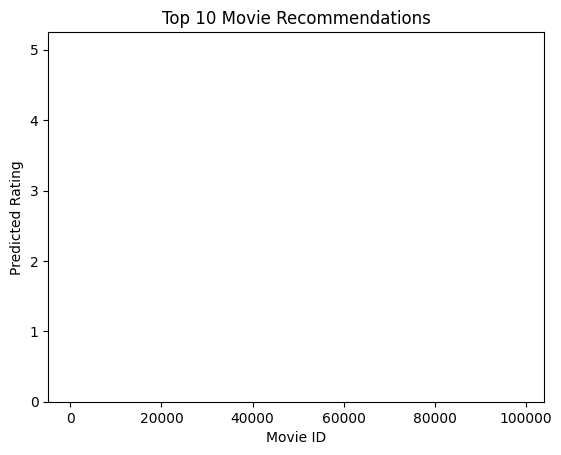

In [9]:
import matplotlib.pyplot as plt

# Extract movie IDs and predicted ratings
movie_ids = [rec[0] for rec in recommendations[:10]]
predicted_ratings = [rec[1] for rec in recommendations[:10]]

# Plot the top 10 recommendations
plt.bar(movie_ids, predicted_ratings, color='skyblue')
plt.xlabel('Movie ID')
plt.ylabel('Predicted Rating')
plt.title('Top 10 Movie Recommendations')
plt.show()


In [10]:
print(f"Unrated movies count: {len(unrated_movies)}")


Unrated movies count: 9492


In [11]:
for rec in recommendations[:10]:
    print(f"Movie ID: {rec[0]}, Predicted Rating: {rec[1]:.2f}")


Movie ID: 318, Predicted Rating: 5.00
Movie ID: 99114, Predicted Rating: 5.00
Movie ID: 720, Predicted Rating: 5.00
Movie ID: 58, Predicted Rating: 5.00
Movie ID: 162, Predicted Rating: 5.00
Movie ID: 898, Predicted Rating: 5.00
Movie ID: 912, Predicted Rating: 5.00
Movie ID: 1203, Predicted Rating: 5.00
Movie ID: 1250, Predicted Rating: 5.00
Movie ID: 2019, Predicted Rating: 5.00


In [12]:
# Load movies dataset
movies = pd.read_csv('movies.csv')

# Convert recommendations to DataFrame
recommendations_df = pd.DataFrame(recommendations[:10], columns=['movieId', 'predicted_rating'])

# Merge with movie titles
top_recommendations = recommendations_df.merge(movies, on='movieId')
print(top_recommendations[['title', 'predicted_rating']])


                                               title  predicted_rating
0                   Shawshank Redemption, The (1994)               5.0
1                            Django Unchained (2012)               5.0
2  Wallace & Gromit: The Best of Aardman Animatio...               5.0
3                  Postman, The (Postino, Il) (1994)               5.0
4                                       Crumb (1994)               5.0
5                     Philadelphia Story, The (1940)               5.0
6                                  Casablanca (1942)               5.0
7                                12 Angry Men (1957)               5.0
8               Bridge on the River Kwai, The (1957)               5.0
9        Seven Samurai (Shichinin no samurai) (1954)               5.0


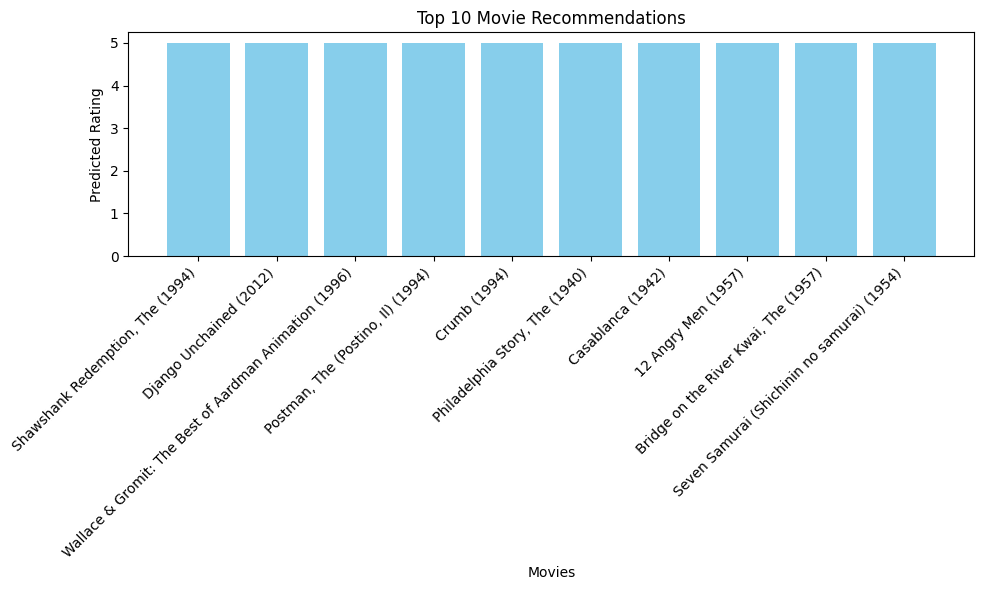

In [13]:
import matplotlib.pyplot as plt

# Use movie titles (if available) or IDs for the chart
if 'title' in top_recommendations.columns:
    labels = top_recommendations['title']
else:
    labels = top_recommendations['movieId']

# Ratings
ratings = top_recommendations['predicted_rating']

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, ratings, color='skyblue')
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.xlabel('Movies')
plt.ylabel('Predicted Rating')
plt.title('Top 10 Movie Recommendations')
plt.tight_layout()
plt.show()


In [14]:
# Sort recommendations by predicted rating in ascending order
least_recommendations = sorted(recommendations, key=lambda x: x[1])[:10]

# Convert to DataFrame for easier processing
least_recommendations_df = pd.DataFrame(least_recommendations, columns=['movieId', 'predicted_rating'])

# Merge with movie titles (if available)
least_recommendations_df = least_recommendations_df.merge(movies, on='movieId', how='left')


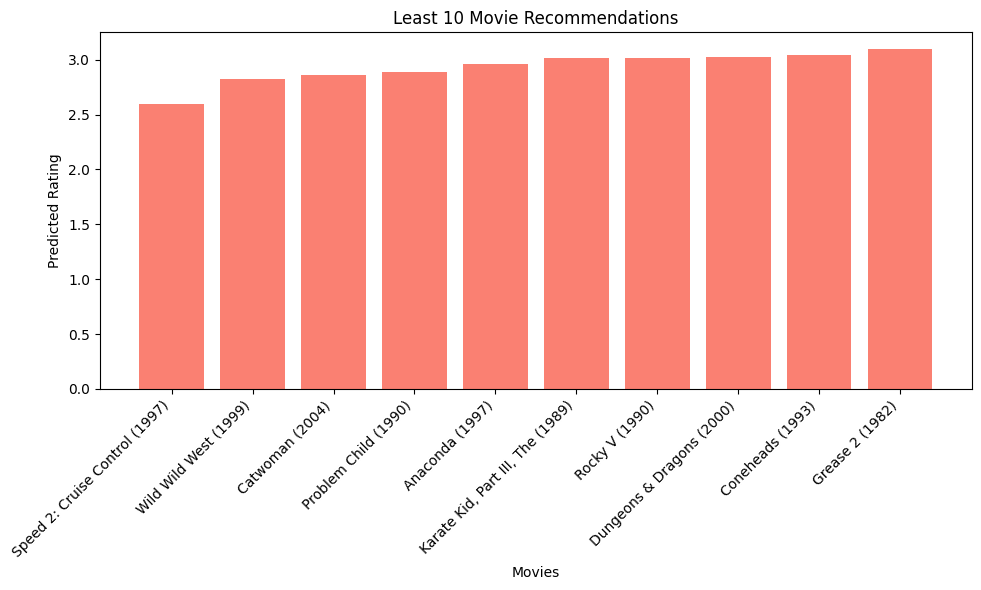

In [15]:
import matplotlib.pyplot as plt

# Use movie titles (if available) or IDs for the chart
if 'title' in least_recommendations_df.columns:
    labels = least_recommendations_df['title']
else:
    labels = least_recommendations_df['movieId']

# Ratings
ratings = least_recommendations_df['predicted_rating']

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(labels, ratings, color='salmon')
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.xlabel('Movies')
plt.ylabel('Predicted Rating')
plt.title('Least 10 Movie Recommendations')
plt.tight_layout()
plt.show()
